In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense, ReLU, Softmax

In [3]:
train_df = pd.read_csv('../Datasets/digit_train.csv')
test_df = pd.read_csv('../Datasets/digit_test.csv')

In [4]:
train = np.array(train_df)
test = np.array(test_df) # test has no label

train_x = train[:,1:]
train_y = train[:,0]

In [5]:
model = tf.keras.Sequential()

In [6]:
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.fit(train_x, train_y, epochs=100)

Epoch 1/100


1313/1313 [==============================] - 7s 4ms/step - loss: 2.1464 - accuracy: 0.8649
Epoch 2/100
1313/1313 [==============================] - 5s 4ms/step - loss: 0.5200 - accuracy: 0.9185
Epoch 3/100
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3617 - accuracy: 0.9321
Epoch 4/100
1313/1313 [==============================] - 6s 4ms/step - loss: 0.2740 - accuracy: 0.9431
Epoch 5/100
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1991 - accuracy: 0.9534
Epoch 6/100
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1536 - accuracy: 0.9602
Epoch 7/100
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1456 - accuracy: 0.9605
Epoch 8/100
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1265 - accuracy: 0.9658
Epoch 9/100
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1126 - accuracy: 0.9686
Epoch 10/100
1313/1313 [==============================] - 5s 4ms/step -

In [9]:
pred = model.predict(test)

875/875 [==============================] - 4s 4ms/step


In [19]:
from matplotlib import pyplot as plt

def showImage(ax, img, label = None):
    ax.axis('off')
    if label != None:
        ax.set_title(f"Predicted Number is : {label}" )
    ax.imshow(img)

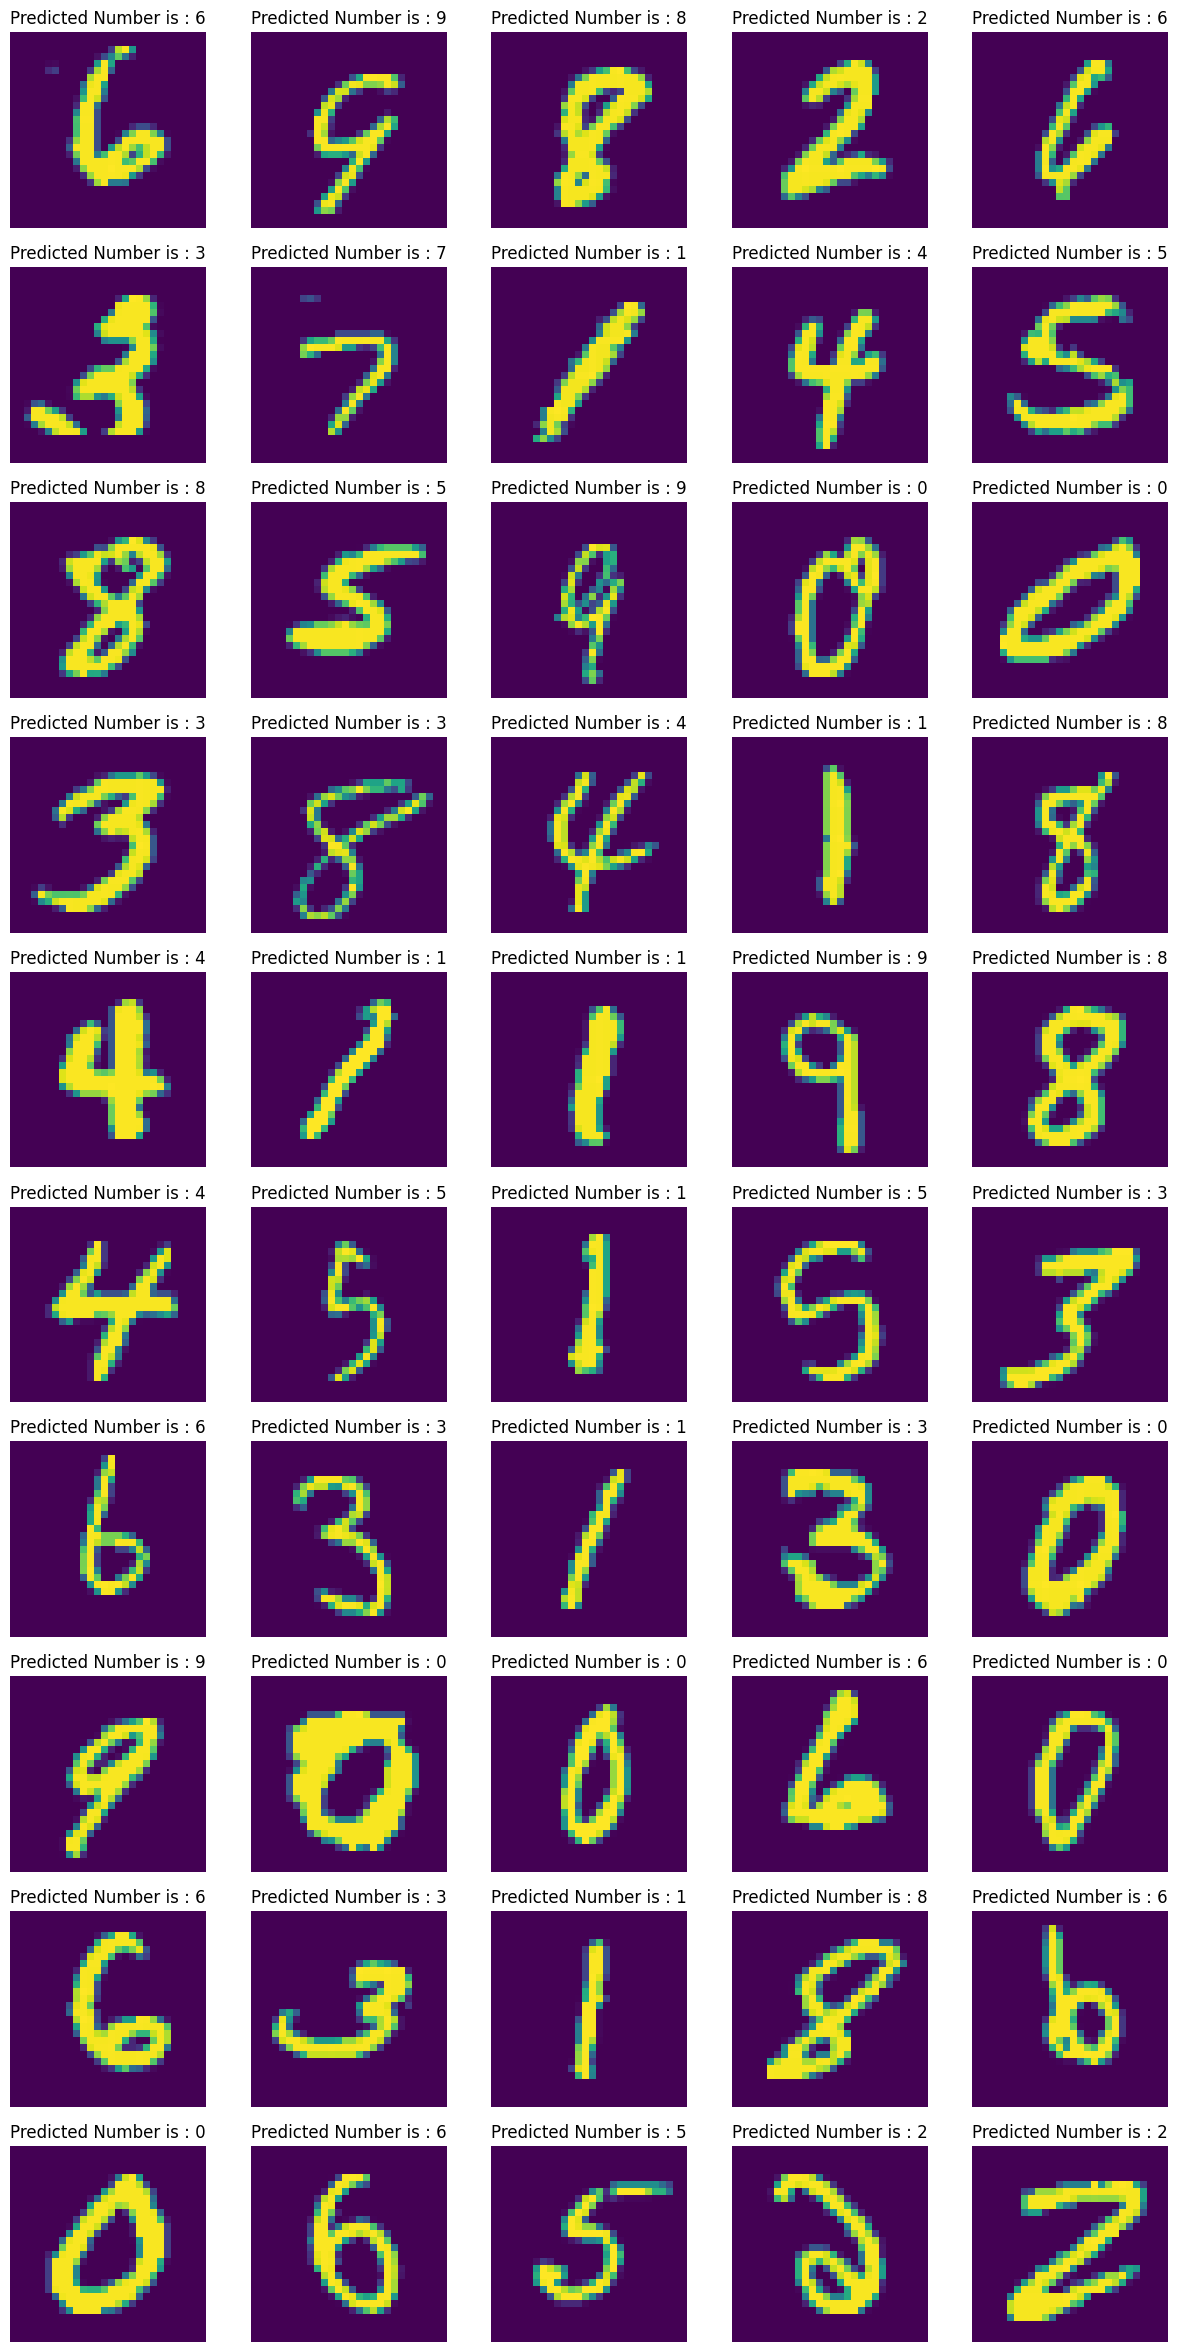

In [30]:
columns = 5
rows = 10
fig_size = (15, 30)

fig, axs = plt.subplots(nrows=rows, ncols=columns, figsize=fig_size)

offset = 300

for idx in range(rows * columns):
    img = test[offset + idx].reshape((28, 28))
    label = np.argmax(pred[offset + idx])
    showImage(axs[idx//columns][idx % columns], img, label)

In [25]:
model.save(filepath="DigitModel")

INFO:tensorflow:Assets written to: DigitModel\assets


INFO:tensorflow:Assets written to: DigitModel\assets


In [35]:
for w in model.weights:
    print(w.shape)

(784, 128)
(128,)
(128, 128)
(128,)
(128, 10)
(10,)
